# Indicateurs énergétiques – Électricité – Ensembles de données et méthodologies

## Importance des données sur l’énergie:

L’existence de données fiables permet au gouvernement, aux acteurs du secteur et au public canadien de mener des discussions et de prendre des décisions éclairées. Ces données jouent un rôle de premier plan en ce qui a trait au renforcement de la confiance du public, de la compétitivité économique et de la capacité du gouvernement à appuyer la transition vers une économie sobre en carbone.

## Aperçu de l’information sur l’énergie au Canada:
L’information sur l’énergie comprend des statistiques, des données, des analyses et des projections liées à la production, la transformation, la distribution et l’utilisation d’énergie, ainsi qu’à l’interrelation entre l’énergie et l’économie, et la société et l’environnement.


Le système d’information sur l’énergie du Canada est le fruit de la contribution de plusieurs organisations, dont les suivantes :  
- quatre ministères et organismes fédéraux;  

 - Ressources naturelles Canada [(lien)](https://www.rncan.gc.ca/accueil);  
 - Statistique Canada [(lien)](https://www.statcan.gc.ca/fra/debut);  
 - Environnement et Changement climatique Canada [(lien)](https://www.canada.ca/fr/environnement-changement-climatique.html);  
 - Régie de l’énergie du Canada [(lien)](https://www.cer-rec.gc.ca/index-fra.html);
- des ministères, organismes de réglementation et régies de services publics provinciaux et territoriaux;  
- des intervenants sur le marché de l’énergie (p. ex., producteurs d’énergie, sociétés pipelinières et exploitants de réseaux);  
- des associations du secteur et organismes de recherche universitaires;  
- le site Web du gouvernement ouvert du Canada [(lien)](https://open.canada.ca/fr);  
- __le Portail canadien d’information sur l’énergie (lancé en juin 2019) [(lien)](https://www.statcan.gc.ca/fra/themes-debut/energie).__


## Portail canadien d’information sur l’énergie:
En juin 2019, le gouvernement du Canada a lancé le Portail canadien d’information sur l’énergie [(lien)](https://www.statcan.gc.ca/fra/themes-debut/energie). Ce portail est un guichet unique pour l’information sur l’énergie qui procure un point d’accès à toutes les statistiques du gouvernement du Canada et propose des liens vers un vaste éventail de produits d’information sur l’énergie.

Bien que l’information sur l’énergie au Canada abonde, il peut être difficile de s’y retrouver, de l’interpréter et de la vérifier, en particulier pour les profanes. De plus, la mesure des données, les définitions et les normes de présentation de l’information varient d’un fournisseur d’information à l’autre. Il arrive souvent que les données ne soient pas accessibles dans des formats structurés et lisibles par machine. Enfin, les données ne sont souvent pas publiées en temps opportun et les délais sont considérés comme trop longs, compte tenu de la demande croissante d’information en temps réel.


## Objectif du présent bloc-notes: 

•	1)  Déterminer les principaux ensembles de données présentés dans les [indicateurs énergétiques portant sur les marchés de l'électricité au Canada](https://www.cer-rec.gc.ca/nrg/tl/nrgcmmdt/nrgndctrlctrct-fra.html);  
•	2) Téléverser chaque ensemble de données utilisé dans les indicateurs énergétiques dans le bloc-notes Jupyter;  
•	3) Faire un graphique pour chaque ensemble de données;  
•	4) Fournir des liens vers d’autres ensembles de données accessibles au public aux fins d’analyse plus poussée.



__Les ensembles de données utilisés dans les indicateurs énergétiques viennent de multiples sources publiques accessibles gratuitement. Les fichiers des ensembles de données comme tels ne sont pas fournis pour accompagner le bloc-notes. Les données sont plutôt téléversées directement dans le bloc-notes par le fournisseur. Cela assure la transparence, la reproductibilité et le caractère opportun pour les utilisateurs.__

__Les ensembles de données utilisés dans ce bloc-notes ne sont généralement pas dans un format bidimensionnel lisible par machine. De plus, les unités de mesure entre les divers ensembles de données ne sont pas normalisées. Ainsi, pour qu’ils présentent une valeur analytique, les ensembles de données du bloc-notes sont transformés et normalisés afin d’assurer leur comparabilité.__

Dans le cas des unités qui ne figurent pas dans ce bloc-notes, la Régie de l’énergie du Canada présente sur son site Web des tables de conversion d’unités d’énergie [(lien)](https://apps.cer-rec.gc.ca/Conversion/conversion-tables.aspx?GoCTemplateCulture=fr-CA).


In [1]:
import pandas as pd 
import tabula
from matplotlib import pyplot as plt
import matplotlib.dates as dates
import requests
from datetime import datetime, timedelta
import io
import zipfile
import numpy as np
pd.options.mode.chained_assignment = None
from pandas.plotting import register_matplotlib_converters
from datetime import datetime, timedelta
import xml.etree.ElementTree as ET
from lxml import objectify
import seaborn as sns

# établir les paramètres globaux
plt.style.use('ggplot')
register_matplotlib_converters()
sns.set_palette(sns.color_palette("tab20", 20))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Indicateurs énergétiques – Électricité

### Prix de l’électricité dans les grandes villes canadiennes

#### 1) Principal ensemble de données
Hydro-Québec, le principal producteur d’électricité du Québec, publie le rapport annuel intitulé Comparaison des prix de l’électricité dans les grandes villes nord-américaines. Ce rapport présente des estimations annuelles des coûts de l’électricité au Canada en fonction d’une consommation de 1 000 kilowattheures par mois [(lien)](http://www.hydroquebec.com/data/documents-donnees/pdf/comparaison-prix-electricite.pdf).

#### 2) Téléverser l’ensemble de données

In [3]:
# obtenir les prix de l’électricité tirés du rapport d’Hydro-Québec « Comparaison des prix de l’électricité dans les grandes villes nord-américaines 2019 »
# le rapport est en format pdf; utiliser tabula-py pour lire les tableaux en pdf
hq_url_link = 'http://www.hydroquebec.com/data/documents-donnees/pdf/comparison-electricity-prices.pdf'
columns = ['City', '2015', '2016', '2017', '2018', '2019']

# prix résidentiels à la page 8
df_residential = tabula.read_pdf(hq_url_link, pages='8').reset_index().dropna(1, 'all')
df_residential.columns = columns
df_residential['City'] = df_residential['City'].str.split(',', n=1, expand=True)
df_residential = df_residential.set_index('City').T 

# prix commerciaux à la page 9
df_commercial = tabula.read_pdf(hq_url_link, pages='9').reset_index().dropna(1, 'all')
df_commercial.columns = columns
df_commercial['City'] = df_commercial['City'].str.split(',', n=1, expand=True)
df_commercial = df_commercial.set_index('City').T

#### 3) Faire un graphique pour l’ensemble de données

In [5]:
# faire un graphique des prix résidentiels et commerciaux de l’électricité
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(12,12)) 

ax1.plot(df_commercial)
ax1.set_ylabel('cents par kilowatt heure (¢/kWh)', fontsize=11)
ax1.set_title('Prix moyens de l’électricité pour les importants consommateurs d’énergie', fontsize=14)
ax1.legend(df_commercial.columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax1.set_ylim(2.5, 19);

ax2.plot(df_residential) 
ax2.set_ylabel('cents par kilowatt heure (¢/kWh)', fontsize=11)
ax2.set_title('Prix moyens de l’électricité pour les consommateurs résidentiels', fontsize=14)
ax2.legend(df_residential.columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax2.set_ylim(2.5, 19);

#### 4) Autres ensembles de données liés aux prix de l’électricité au Canada

À l’extérieur de l’Alberta et de l’Ontario, les tarifs d’électricité sont réglementés par les régies de services publics provinciales.

-	À Terre-Neuve-et-Labrador, les tarifs d’électricité imposés par NLHydro sont réglementés par le Newfoundland and Labrador Board of Commissioners of Public Utilities [(lien)](https://nlhydro.com/electricity-rates/regulatory-information/);
-	En Nouvelle-Écosse, les tarifs d’électricité imposés par Nova Scotia Power sont réglementés par la Nova Scotia Utility and Review Board [(lien)](https://www.nspower.ca/en/home/myaccount/billing-and-payments/power-rates.aspx);
-	Au Nouveau-Brunswick, les tarifs d’électricité imposés par Énergie NB sont réglementés par la Commission de l’énergie et des services publics du Nouveau-Brunswick [(lien)](https://www.nbpower.com/fr/products-services/residential/rates);
-	À l’Île-du-Prince-Édouard, les tarifs d’électricité imposés par Maritimes Electric sont réglementés par la Commission de réglementation et d’appels de l’Île-du-Prince-Édouard [(lien)](https://www.maritimeelectric.com/about-us/regulatory/rates-and-general-rules-and-regulations/);
-	Au Québec, les tarifs d’électricité imposés par Hydro-Québec sont réglementés par la Régie de l’énergie [(lien)](http://www.hydroquebec.com/residentiel/espace-clients/tarifs/);
-	Au Manitoba, les tarifs d’électricité imposés par Manitoba Hydro sont réglementés par la Régie des services publics du Manitoba [(lien)](https://www.hydro.mb.ca/fr/accounts_and_services/rates/);
-	En Saskatchewan, les tarifs d’électricité imposés par SaskPower sont réglementés par le Saskatchewan Rate Review Panel [(lien)](https://www.saskpower.com/Accounts-and-Services/Billing/Power-Rates/Power-Supply-Rates);
-	En Colombie-Britannique, les tarifs d’électricité imposés par BC Hydro sont réglementés par la British Columbia Utilities Commission [(lien)](https://app.bchydro.com/accounts-billing/rates-energy-use/electricity-rates.html);
-	Au Yukon, les tarifs d’électricité imposés par ATCO Electric Yukon [(lien)](https://www.atcoelectricyukon.com/en-ca/customer-billing-rates/rates-regulations.html) et Énergie Yukon [(lien)](https://yukonenergy.ca/fr/service-a-la-clientele/comptes-et-facturation/echelles-tarifaires) sont réglementés par la Régie des entreprises de services publics;
-	Aux Territoires du Nord-Ouest, les tarifs d’électricité imposés par la Northwest Territories Power Corporation sont réglementés par la Régie des entreprises de service public des Territoires du Nord-Ouest [(lien)](https://www.ntpc.com/customer-service/residential-service/what-is-my-power-rate);
-	Au Nunavut, les tarifs d’électricité imposés par la Société d’énergie Qulliq sont réglementés par le Conseil d’examen des taux des entreprises de service [(lien)](http://www.qec.nu.ca/customer-care/accounts-and-billing/customer-rateshttp://www.qec.nu.ca/fr/node/364).

En Ontario et en Alberta, on trouve des marchés de gros de l’électricité ouverts et concurrentiels où les prix de l’électricité fluctuent d’heure en heure selon les conditions du marché. L’offre et la demande d’électricité sont gérées par un exploitant indépendant de réseau.

Compte tenu de la conception du marché de l’électricité dans ces deux provinces, de l’information en temps réel sur les conditions du marché peut être obtenue auprès des exploitants de réseau. Les principaux intervenants sur le marché utilisent cette information pour prendre des décisions à court et à long terme quant à leur intégration au marché de l’électricité. Bien que le prix de l’électricité soit dicté par le marché, les tarifs d’acheminement et de distribution continuent d’être réglementés par la Commission de l’énergie de l’Ontario en Ontario [(lien)](https://www.oeb.ca/fr/propos-de-nous/mission-et-mandat/secteur-de-lenergie-de-lontario) et l’Alberta Utilities Commission en Alberta [(lien)](http://www.auc.ab.ca/pages/electric-industry.aspx).

*Les clients résidentiels ne sont pas tous raccordés aux services publics provinciaux susmentionnés. Certains services sont reliés à des distributeurs qui doivent se conformer à une réglementation différente en matière de tarifs.

##### 4)a) Prix récents et en temps réel en Alberta

En Alberta, l’Alberta Electric System Operator (« AESO ») gère et exploite le réseau électrique de la province. L’AESO fournit des données historiques en temps réel sur les prix de gros de l’électricité, l’offre et la demande, les interruptions d’acheminement et de production, les services auxiliaires, les réserves d’exploitation et d’autres ressources à l’intention des intervenants sur le marché. Des données actuelles et historiques de l’AESO sont disponibles sur le site Web de la société [(lien)](http://ets.aeso.ca/).

Les cellules suivantes présentent les prix horaires de l’électricité en Alberta pour les deux dernières semaines, ainsi que les prix en temps réel.


In [6]:
# prix horaires de l’électricité en Alberta pour les deux dernières semaines
time_delta = 14 # contrôler l’écart de temps (time_delta) pour la durée à partir d’aujourd’hui; 14 derniers jours par défaut
today = datetime.today().strftime('%m%d%Y')
start_date = (datetime.today() - timedelta(days=time_delta)).strftime('%m%d%Y')
url_aeso = 'http://ets.aeso.ca/ets_web/ip/Market/Reports/HistoricalPoolPriceReportServlet?beginDate=' + start_date + '&endDate=' + today + '&contentType=csv'
df_aeso = pd.read_csv(url_aeso, skiprows=4, header=0, index_col=None)

# supprimer les doublons (corrections)
df_aeso['Date (HE)'] = df_aeso['Date (HE)'].str.replace('*', '')
df_aeso = df_aeso.drop_duplicates(subset='Date (HE)', keep='last')
df_aeso[['Date', 'hour']] = df_aeso['Date (HE)'].str.split(' ', expand=True)
df_aeso['hour'] = df_aeso['hour'].astype('int32') - 1 # hour should be start of hour

# créer un indice date/heure en fonction de la date et de l’heure
df_aeso['Date'] = pd.to_datetime(df_aeso['Date'] + ' ' + df_aeso['hour'].astype(str), format = '%m/%d/%Y %H')
df_aeso = df_aeso.drop(['hour', 'Date (HE)'], axis=1).set_index('Date')

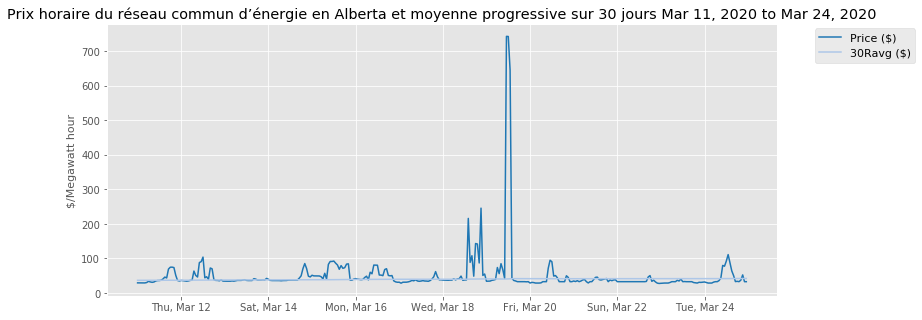

In [7]:

fig, (ax1)= plt.subplots(ncols=1, nrows=1, figsize=(12, 5))
title = 'Prix horaire du réseau commun d’énergie en Alberta et moyenne progressive sur 30 jours ' + df_aeso.index.min().strftime('%b %d, %Y') + ' to ' + df_aeso.index.max().strftime('%b %d, %Y')
ax1.plot(df_aeso[['Price ($)', '30Ravg ($)']]) 
ax1.set_ylabel('$/Megawatt hour', fontsize=11)
ax1.set_title(title)
ax1.legend(df_aeso[['Price ($)', '30Ravg ($)']].columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax1.xaxis.set_major_locator(dates.DayLocator(interval=2)) 
ax1.xaxis.set_major_formatter(dates.DateFormatter('%a, %b %d'));

In [8]:
# prix horaire de l’électricité en temps réel en Alberta aujourd’hui
url_aeso_rt = 'http://ets.aeso.ca/ets_web/ip/Market/Reports/ActualForecastWMRQHReportServlet'
df_aeso_rt = pd.read_html(url_aeso_rt, header=0, index_col=None)[1]

# créer un indice date/heure en fonction de la date et de l’heure
df_aeso_rt[['Date', 'hour']] = df_aeso_rt['Date (HE)'].str.split(' ', expand=True)
df_aeso_rt['hour'] = df_aeso_rt['hour'].astype('int32') - 1 # l'heure est considérée à son début
df_aeso_rt['Date'] = pd.to_datetime(df_aeso_rt['Date'] + ' ' + df_aeso_rt['hour'].astype(str), format = '%m/%d/%Y %H')

# créer un indice date/heure en fonction de la date et de l’heure
df_aeso_rt = df_aeso_rt.drop(['hour', 'Date (HE)'], axis=1).set_index('Date')
df_aeso_rt = df_aeso_rt.replace('-', np.nan).apply(pd.to_numeric, errors='coerce')

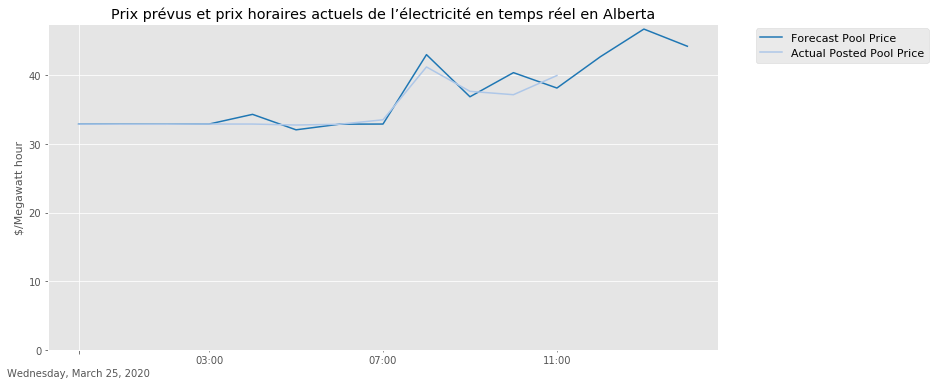

In [9]:
# faire un graphique du prix de l’électricité en temps réel en Alberta
f, (ax) = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
ax.plot(df_aeso_rt[['Forecast Pool Price', 'Actual Posted Pool Price']])
ax.set_ylim(bottom=0)
ax.set_ylabel('$/Megawatt hour', fontsize=11)
ax.set_title('Prix prévus et prix horaires actuels de l’électricité en temps réel en Alberta')
ax.legend(df_aeso_rt[['Forecast Pool Price', 'Actual Posted Pool Price']].columns, fontsize=11, 
          bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax.xaxis.set_minor_locator(dates.HourLocator(interval=4))    
ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M'))   
ax.xaxis.set_major_locator(dates.DayLocator(interval = 1))
ax.xaxis.set_major_formatter(dates.DateFormatter('\n%A, %B %d, %Y'));

##### 4)b) Prix récents et en temps réel en Ontario

En Ontario, la Société indépendante d’exploitation du réseau d’électricité (« SIERE ») gère et exploite le réseau électrique de la province. La SIERE fournit des données historiques en temps réel sur les prix de gros de l’électricité, l’offre et la demande, les interruptions d’acheminement et de production, les services auxiliaires et les réserves d’exploitation, ainsi que d’autres ressources à l’intention des intervenants sur le marché. Des données actuelles et historiques de la SIERE figurent sur le site Web de la société [(lien)](http://www.ieso.ca/power-data).

En Ontario, le prix horaire de l’énergie est facturé aux sociétés de distribution locales et s’applique aux autres charges non distribuables. Le prix horaire de l’énergie est également versé aux producteurs autonomes. Les entreprises qui consomment plus de 250 000 kWh par année paient ce tarif. Le prix horaire de l’énergie sert également à fixer les tarifs réglementés imposés aux clients résidentiels et aux petites entreprises.

En plus du prix horaire de l’énergie, tous les clients ontariens paient des frais de rajustement global. Le rajustement global est un montant qui couvre le coût de construction de la nouvelle infrastructure d’électricité et de mise en œuvre des programmes d’économie d’énergie de l’Ontario. De l’information sur le rajustement global figure sur le site Web de la SIERE [(lien)](http://www.ieso.ca/francais/Tarification-de-lelectricite/Quest-ce-que-le-rajustement-global).

Les cellules suivantes présentent les prix horaires de l’électricité en Ontario pour les deux dernières semaines, ainsi que les prix en temps réel.


In [10]:
# récents prix de l’électricité en Ontario
# prix horaire de l’énergie de 2002 à aujourd’hui disponible au http://reports.ieso.ca/public/PriceHOEPPredispOR/ 

url_ieso = 'http://reports.ieso.ca/public/PriceHOEPPredispOR/PUB_PriceHOEPPredispOR.csv'
df_ieso = pd.read_csv(url_ieso, header=3, parse_dates=['Date'], index_col=None)
df_ieso['Date'] = df_ieso['Date'] + pd.to_timedelta(df_ieso['Hour']-1, unit='h')
df_ieso.set_index('Date', inplace=True)

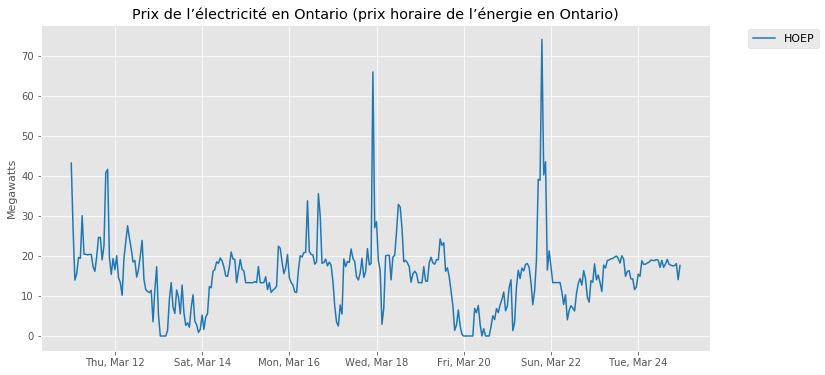

In [11]:
# faire un graphique du prix de l’électricité le plus récent en Ontario
f, (ax) = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
hours_delta = 14 * 24 # last two weeks
ax.plot(df_ieso[['HOEP']].tail(hours_delta))
ax.set_ylabel('Megawatts', fontsize=11)
title = "Prix de l’électricité en Ontario (prix horaire de l’énergie en Ontario)"
ax.set_title(title)
ax.legend(df_ieso[['HOEP']].columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax.xaxis.set_major_locator(dates.DayLocator(interval=2)) 
ax.xaxis.set_major_formatter(dates.DateFormatter('%a, %b %d'));

In [12]:
# prix de l’électricité en temps réel en Ontario aujourd’hui
url_ieso_rt = 'http://reports.ieso.ca/public/DispUnconsHOEP/PUB_DispUnconsHOEP.csv'
df_ieso_rt = pd.read_csv(url_ieso_rt, index_col=None, header=2).reset_index()
dt = df_ieso_rt.columns[-1].split(' FOR ')[-1] # obtenir la date correspondant aux prix
df_ieso_rt.drop(df_ieso_rt.columns[-1], axis=1, inplace=True) # supprimer la dernière colonne
df_ieso_rt.columns = ['Hour', 'Price'] # renommer des colonnes

# créer un indice date/heure en fonction de la date et de l’heure
df_ieso_rt['Date'] = pd.to_datetime(dt + ' ' + (df_ieso_rt['Hour'] - 1).astype(str).str.rjust(2, '0'), format='%Y/%m/%d %H')
df_ieso_rt = df_ieso_rt.drop('Hour', axis=1).set_index('Date')

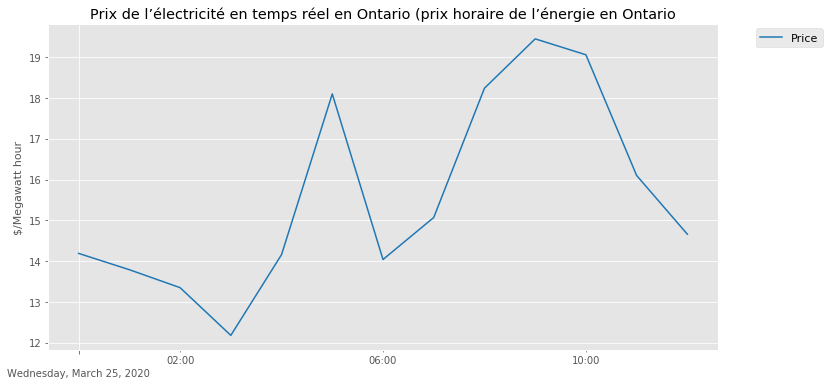

In [14]:
# faire un graphique du prix de l’électricité en temps réel en Ontario
f, (ax) = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
ax.plot(df_ieso_rt)
ax.set_ylabel('$/Megawatt hour', fontsize=11)
ax.set_title('Prix de l’électricité en temps réel en Ontario (prix horaire de l’énergie en Ontario')
ax.legend(df_ieso_rt.columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax.xaxis.set_minor_locator(dates.HourLocator(interval=4))    
ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M'))   
ax.xaxis.set_major_locator(dates.DayLocator(interval = 1))
ax.xaxis.set_major_formatter(dates.DateFormatter('\n%A, %B %d, %Y'));

### Capacité de production électrique installée
Les centrales électriques convertissent diverses formes d’énergie, comme l’énergie thermique, cinétique et solaire, en énergie électrique. La capacité fait référence à la puissance maximale théorique d’une centrale. La production fait référence à la puissance cumulative au fil du temps. En raison des fluctuations de la puissance, en particulier avec les sources d’énergie renouvelable, la relation entre la capacité et la production varie. L’hydroélectricité est la plus importante source de capacité et de production au Canada.

#### 1) Principal ensemble de données
Statistique Canada publie le rapport intitulé Centrales installées, puissance génératrice annuelle selon le type de production d'électricité (tableau 25-10-0022)  [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510002201&request_locale=fr). Ce rapport annuel présente la capacité de production totale selon le type de combustible.


#### 2) Téléverser l’ensemble de données dans le bloc-notes

In [15]:
# Statistique Canada, tableau 25100022 « Centrales installées, puissance génératrice annuelle selon le type de production d’électricité »
# extraire le csv d’un fichier zip
url_installed_capacity = 'https://www150.statcan.gc.ca/n1/tbl/csv/25100022-eng.zip'
file_installed_capacity = '25100022.csv'
r = requests.get(url_installed_capacity, allow_redirects=True)
zip_file = zipfile.ZipFile(io.BytesIO(r.content))
installed_capacity = pd.read_csv(zip_file.open(file_installed_capacity), index_col=None, header=0)

# filtrer pour le Canada et tous les producteurs d’électricité
installed_capacity_canada = installed_capacity[(installed_capacity['GEO'] == 'Canada') 
                                               & (installed_capacity['Class of electricity producer'] == 'Total all classes of electricity producer')]
installed_capacity_canada['VALUE'] = installed_capacity_canada['VALUE'] / 1000000 # convertir en térawatts

# transposer selon le type de production électrique pour les graphiques
installed_capacity_canada = installed_capacity_canada[['REF_DATE', 'Type of electricity generation', 
                                                       'VALUE']].pivot('REF_DATE', 'Type of electricity generation')['VALUE']

#### 3) Faire un graphique pour l’ensemble de données

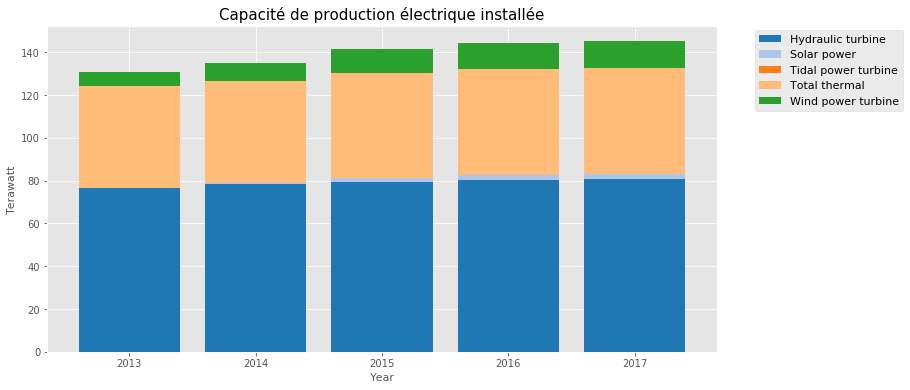

In [17]:
# faire un graphique de la capacité installée au Canada
cap_chart = installed_capacity_canada[['Hydraulic turbine', 'Solar power', 'Tidal power turbine', 
                                       'Total thermal', 'Wind power turbine']][installed_capacity_canada.index >= 2013]

ax1 = cap_chart.plot(kind='bar', stacked=True, figsize=(12,6), width=0.8)
ax1.set_ylabel('Terawatt', fontsize=11)
ax1.set_xlabel('Year', fontsize=11)
ax1.set_title('Capacité de production électrique installée', fontsize=15)
ax1.legend(cap_chart.columns, fontsize=11, bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.4)
ax1.set_xticklabels(cap_chart.index, rotation=0);

En 2017, la capacité de production électrique installée au Canada a atteint 145,2 GW. La capacité en électricité varie grandement entre les provinces et les territoires selon la nature de l’énergie disponible, la viabilité économique et les choix de politiques. L’hydroélectricité demeure la principale source, comptant pour 55,6 % de la capacité totale. L’énergie thermique (gaz naturel et charbon) et le nucléaire constituent les sources d’électricité les plus communes après l’hydroélectricité, tandis que la part des énergies renouvelables autres qu’hydroélectriques, comme le vent, le soleil et la biomasse, est plus faible.

#### 4)  Autres ensembles de données liés à la capacité de production électrique installée

La Régie de l’énergie du Canada publie un rapport annuel sur l’avenir énergétique, une projection de l’offre et de la demande énergétiques au Canada jusqu’en 2040 [(lien)](https://www.cer-rec.gc.ca/nrg/ntgrtd/ftr/2018/pblctn-fra.html). Le rapport présente des données et des analyses sur la capacité de production d’électricité historique et projetée au Canada (capacité électricité 2018) [(lien)](https://ouvert.canada.ca/data/fr/dataset/94d3af0e-851c-47f3-8919-998c384b0e71).

En Ontario, la SIERE publie un rapport sur la capacité de production électrique horaire et la production par centrale [(lien)](http://reports.ieso.ca/public/GenOutputCapability/PUB_GenOutputCapability_20190902.xml).

Manitoba Hydro fournit une description détaillée de toutes les centrales au Manitoba, ainsi que de leurs capacités [(lien)](https://www.hydro.mb.ca/fr/corporate/facilities/generating_stations/).

SaskPower fournit une carte illustrant la capacité de production électrique des installations de la Saskatchewan [(lien)](https://www.saskpower.com/Our-Power-Future/Our-Electricity/Electrical-System/System-Map).

En Alberta, l’AESO publie un rapport sur la capacité de production électrique actuelle (capacité maximale) [(lien)](http://ets.aeso.ca/ets_web/ip/Market/Reports/CSDReportServlet).

BC Hydro fournit une description détaillée de toutes les installations de production d’électricité en Colombie-Britannique [(lien)](https://www.bchydro.com/energy-in-bc/operations/our-facilities.html).


### Production d’électricité
Au Canada, la production d’électricité repose principalement sur l’énergie hydraulique. En 2018, l’électricité produite au Canada provenait à 66,0 % d’énergies renouvelables (y compris de l’énergie hydraulique) et 80,6 % était sans émissions (comprend le nucléaire). Depuis 2005, la part de la production totale représentée par les énergies renouvelables autres qu’hydroélectriques est passée de 1,5 % à 7,2 % en 2018. L’électricité qui n’est pas consommée au pays est exportée.


#### 1) Principal ensemble de données

Statistique Canada publie le rapport intitulé Production de l'énergie électrique, production mensuelle selon le type d'électricité (tableau 25-10-0015)  [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510001501&request_locale=fr). Ce rapport mensuel présente la production totale d’électricité selon le type et la province.

#### 2) Téléverser l’ensemble de données

In [18]:
# Statistique Canada, tableau 25100015 « Production de l'énergie électrique, production mensuelle selon le type d'électricité »
# extraire le csv d’un fichier zip
url_power_gen = 'https://www150.statcan.gc.ca/n1/en/tbl/csv/25100015-eng.zip' 
file_power_gen = '25100015.csv'
r = requests.get(url_power_gen, allow_redirects=True)
zip_file = zipfile.ZipFile(io.BytesIO(r.content))
power_gen = pd.read_csv(zip_file.open(file_power_gen), index_col=None, header=0, parse_dates=['REF_DATE'], low_memory=False)

# filtrer pour obtenir les données pour le Canada et tous les producteurs d’électricité
power_gen_canada = power_gen[(power_gen['GEO'] == 'Canada') 
                             & (power_gen['Class of electricity producer'] == 'Total all classes of electricity producer')]
power_gen_canada['VALUE'] = power_gen_canada['VALUE'] / 1000000 # convertir en térawattheures
# transposer selon le type de production d’électricité (pour les graphiques)
power_gen_canada = power_gen_canada[['REF_DATE', 'Type of electricity generation', 
                                     'VALUE']].pivot('REF_DATE', 'Type of electricity generation')['VALUE']

# filtrer pour obtenir tous les types de production d’électricité et tous les producteurs d’électricité
power_gen_prov = power_gen[(power_gen['Type of electricity generation'] == 'Total all types of electricity generation') & 
                           (power_gen['Class of electricity producer'] == 'Total all classes of electricity producer')]
power_gen_prov['VALUE'] = power_gen_prov['VALUE'] / 1000000 # convertir en térawattheures
# transposer selon la région / province (pour les graphiques)
power_gen_prov = power_gen_prov[['REF_DATE', 'GEO', 'VALUE']].pivot('REF_DATE', 'GEO')['VALUE']

#### 3) Faire un graphique pour l’ensemble de données

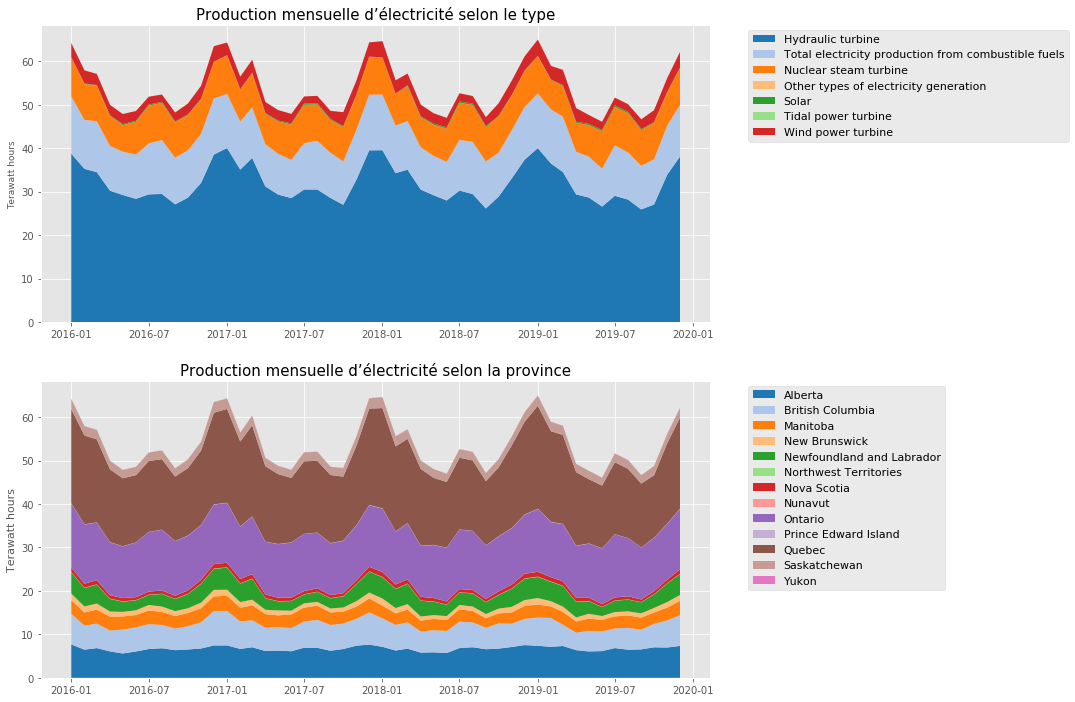

In [19]:
# faire un graphique illustrant la production d’électricité selon le type de production et la région
type_chart = power_gen_canada[['Hydraulic turbine', 'Total electricity production from combustible fuels', 
                               'Nuclear steam turbine', 'Other types of electricity generation', 'Solar', 
                               'Tidal power turbine', 'Wind power turbine']][power_gen_canada.index.year >= 2016]
provs = [prov for prov in power_gen_prov.columns if prov != 'Canada' ]
prov_chart = power_gen_prov[power_gen_prov.index.year >= 2016][provs]

fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(12, 12))
ax1.stackplot(type_chart.index, type_chart.T)
ax1.set_ylabel('Terawatt hours', fontsize=9)
ax1.set_title('Production mensuelle d’électricité selon le type', fontsize=15)
ax1.legend(type_chart.columns, fontsize=11, bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.4);

from matplotlib import pyplot as plt

ax2.stackplot(prov_chart.index, prov_chart.T) 
ax2.set_ylabel('Terawatt hours', fontsize=11)
ax2.set_title('Production mensuelle d’électricité selon la province', fontsize=15)
ax2.legend(prov_chart.columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4);

#### 4) Autres ensembles de données liés à la production d’électricité au Canada
Newfoundland and Labrador Board of Commissioners of Public Utilities publie un rapport quotidien sur l’offre et la demande [(lien)](http://www.pub.nf.ca/applications/IslandInterconnectedSystem/DemandStatusReports.htm).

En Ontario, la SIERE publie un rapport sur la capacité de production électrique horaire et la production par centrale [(lien)](http://reports.ieso.ca/public/GenOutputCapability/PUB_GenOutputCapability_20190902.xml).

En Alberta, l’AESO publie un rapport sur la production d’électricité actuelle (production nette totale) [(lien)](http://ets.aeso.ca/ets_web/ip/Market/Reports/CSDReportServlet).
 

### Consommation d’électricité
La consommation d’électricité varie grandement au Canada. Les facteurs qui influent le plus sur celle-ci sont la population et l’importance de l’industrie lourde. En outre, certaines provinces privilégient certains types de combustibles pour répondre à la demande de services énergétiques, comme le chauffage des bâtiments et de l’eau, ce qui a une incidence sur la demande régionale. En raison de sa taille, de ses industries et de sa préférence pour l’électricité afin de chauffer les bâtiments et l’eau, le Québec est la province où l’on consomme le plus d’électricité au Canada.

#### 1) Principal ensemble de données

Statistique Canada publie le rapport intitulé Production de l'énergie électrique, réceptions, livraisons et disponibilité, mensuel (tableau 25-10-0016)  [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510001601&request_locale=fr). Ce rapport mensuel présente la consommation d’électricité selon la province.



#### 2) Téléverser l’ensemble de données

In [20]:
# Statistique Canada, tableau 25100016 « Production de l'énergie électrique, réceptions, livraisons et disponibilité, mensuel »
# extraire le csv d’un fichier zip
url_demand = 'https://www150.statcan.gc.ca/n1/tbl/csv/25100016-eng.zip'
file_demand = '25100016.csv'
r = requests.get(url_demand, allow_redirects=True)
zip_file = zipfile.ZipFile(io.BytesIO(r.content))
demand = pd.read_csv(zip_file.open(file_demand), index_col=None, header=0, parse_dates=['REF_DATE'])

# filtrer pour obtenir l’électricité totale disponible
demand_prov = demand[(demand['Electric power, components'] == 'Total electricity available for use within specific geographic border')][['REF_DATE', 'GEO', 'VALUE']]
demand_prov['VALUE'] = demand_prov['VALUE'] / 1000000 # convertir en térawattheures

# transposer selon la région / province pour les graphiques
demand_prov = demand_prov.pivot('REF_DATE', 'GEO')['VALUE']

#### 3) Faire un graphique pour l’ensemble de données

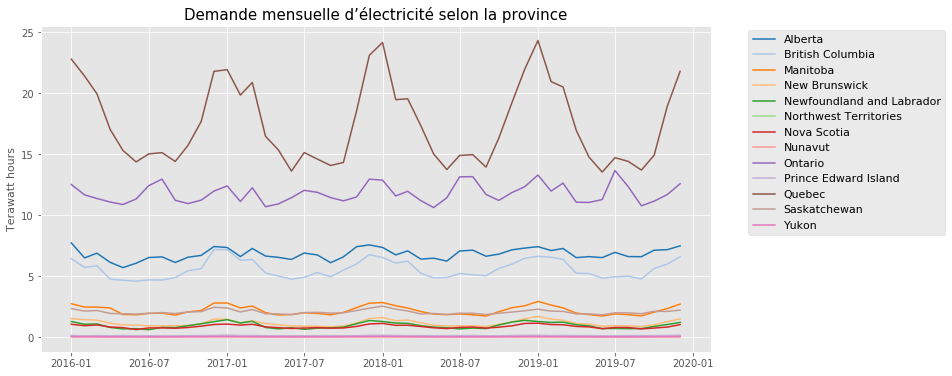

In [22]:
provs = [prov for prov in demand_prov.columns if prov != 'Canada' ]
demand_chart = demand_prov[provs][demand_prov.index.year >= 2016]

fig, (ax1)= plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
ax1.plot(demand_chart) 
ax1.set_ylabel('Terawatt hours', fontsize=11)
ax1.set_title('Demande mensuelle d’électricité selon la province', fontsize=15)
ax1.legend(demand_chart.columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4);

La demande d’électricité au Canada varie selon la saison, mais c’est durant l’hiver qu’elle est la plus élevée dans la plupart des provinces. Les fluctuations saisonnières sont influencées par une demande accrue dans les secteurs commerciaux et résidentiels durant l’hiver en raison des besoins en chauffage. En général, la consommation industrielle d’électricité est uniforme tout au long de l’année.

La nature saisonnière est beaucoup plus marquée dans les provinces maritimes et au Québec, car les locaux sont surtout chauffés à l’électricité. Cela contraste avec le reste du Canada, où l’on utilise principalement le gaz naturel pour le chauffage des maisons.


#### 4) Autres ensembles de données liés à la consommation d’électricité au Canada

Le rapport Disponibilité et écoulement d'énergie primaire et secondaire en térajoules, annuel (tableau 25-10-0029) de Statistique Canada présente des données sur la demande annuelle d’électricité selon le secteur [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/cv.action?pid=2510002901&request_locale=fr). Le rapport renferme des données en unités d’énergie (térajoules) qui permettent de faire des comparaisons entre les combustibles et des cumuls. Statistique Canada publie également le rapport intitulé Disponibilité et écoulement d'énergie primaire et secondaire en unités naturelles (tableau 25-10-0030-01). Ce rapport renferme les mêmes données, mais en unités naturelles, qui varient selon le type d’énergie (litres pour les combustibles liquides, GWh pour l’électricité, etc.), ce qui fait qu’elles ne peuvent pas toujours être cumulées ni comparées directement selon le type de combustible [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510003001&request_locale=fr).

La Base de données nationale sur la consommation d'énergie de Ressources naturelles Canada [(lien)](http://oee.nrcan.gc.ca/organisme/statistiques/bnce/apd/accueil.cfm) renferme des renseignements détaillés sur la consommation finale dans un secteur (p. ex., consommation d’électricité pour le chauffage des locaux, la climatisation et les appareils électroménagers dans le secteur résidentiel), ainsi qu’une ventilation détaillée par secteur.

Newfoundland and Labrador Board of Commissioners of Public Utilities publie un rapport quotidien sur l’offre et la demande [(lien)](http://www.pub.nf.ca/applications/IslandInterconnectedSystem/DemandStatusReports.htm).

Nova Scotia Power publie des mises à jour horaires de la production d’électricité en Nouvelle-Écosse ainsi qu’un rapport quotidien sur la capacité et la production éoliennes de la province des 30 derniers jours [(lien)](https://www.nspower.ca/en/home/about-us/todayspower.aspx#%20). La demande horaire historique en Nouvelle-Écosse est aussi disponible [(lien)](http://oasis.nspower.ca/en/home/oasis/monthly-reports/hourly-total-net-nova-scotia-load.aspx).

Le Nouveau-Brunswick publie un rapport présentant la demande horaire provinciale et les transferts des réseaux interconnectés aux frontières de la province [(lien)](https://tso.nbpower.com/Public/fr/system_information_archive.aspx).

L’AESO en Alberta et la SIERE en Ontario publient des données en temps réel sur la demande horaire d’électricité.

##### 4)a) Demande récente et en temps réel d’électricité en Albertaa

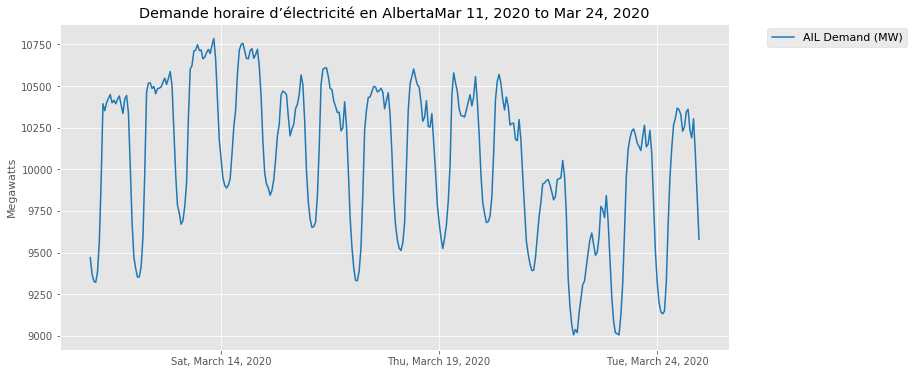

In [24]:
# demande horaire d’électricité en Alberta pour les deux dernières semaines
# données de base disponibles au http://ets.aeso.ca/
# données déjà dans df_aeso (s’assurer que les cellules sont exécutées)

fig, (ax1)= plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
title = 'Demande horaire d’électricité en Alberta' + df_aeso.index.min().strftime('%b %d, %Y') + ' to ' + df_aeso.index.max().strftime('%b %d, %Y')
ax1.plot(df_aeso[['AIL Demand (MW)']]) 
ax1.set_ylabel('Megawatts', fontsize=11)
ax1.set_title(title)
ax1.legend(df_aeso[['AIL Demand (MW)']].columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax1.xaxis.set_major_locator(dates.DayLocator(interval=5)) 
ax1.xaxis.set_major_formatter(dates.DateFormatter('%a, %B %d, %Y'));

##### 4)b) Demande récente et en temps réel d’électricité en Ontario

In [25]:
# demande horaire d’électricité en Ontario, http://reports.ieso.ca/public/Demand/

url_ieso_dem = 'http://reports.ieso.ca/public/Demand/PUB_Demand.csv'
df_ieso_dem = pd.read_csv(url_ieso_dem, header=3, parse_dates=['Date'], index_col=None)

# créer un indice date/heure en fonction de la date et de l’heure
df_ieso_dem['Date'] = df_ieso_dem['Date'] + pd.to_timedelta(df_ieso_dem['Hour']-1, unit='h')
df_ieso_dem = df_ieso_dem.drop('Hour', axis=1).set_index('Date')

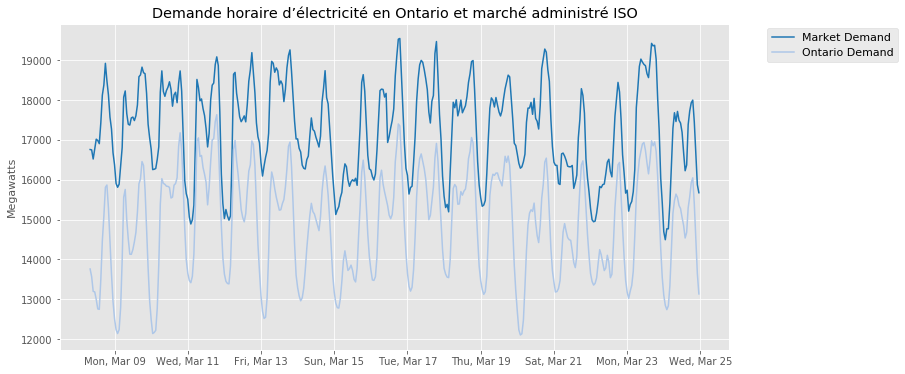

In [26]:
f, (ax) = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
ax.plot(df_ieso_dem.tail(400))
ax.set_ylabel('Megawatts', fontsize=11)
ax.set_title('Demande horaire d’électricité en Ontario et marché administré ISO')
ax.legend(df_ieso_dem.columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax.xaxis.set_major_locator(dates.DayLocator(interval=2)) 
ax.xaxis.set_major_formatter(dates.DateFormatter('%a, %b %d'));
# La demande du marché correspond à l’énergie totale fournie par le marché administré ISO.

### Exportations d’électricité

#### 1) Principal ensemble de données


La Régie réglemente les importations et les exportations de produits énergétiques. Les sociétés qui importent et exportent de l’électricité détiennent une autorisation réglementaire de la Régie et doivent faire rapport de leurs activités tous les mois. Le Système de suivi des produits (« SSP ») accessible à partir du site Web de la Régie renferme des statistiques sur les exportations d’électricité [(lien)](https://apps.cer-rec.gc.ca/CommodityStatistics/Statistics.aspx?Language=French). Il est possible d’accéder à des fichiers bidimensionnels lisibles par machine provenant du SSP sur le site Web du gouvernement ouvert et ceux-ci sont mis à jour chaque mois [(lien)](https://ouvert.canada.ca/data/fr/dataset/5c358f51-bc8c-4565-854d-9d2e35e6b178).

#### 2) Téléverser l’ensemble de données

In [27]:
# Des données sur les échanges accessibles à partir du site du gouvernement ouvert sont fournies par la Régie de l’énergie du Canada

url_trade = 'https://www.cer-rec.gc.ca/open/imports-exports/electricity-exports-and-imports-monthly.csv'
df_trade = pd.read_csv(url_trade, encoding='latin-1', parse_dates=['Period'], index_col=None, header=0)
df_trade['Energy (TW.h)'] = df_trade['Energy (MW.h)'] / 1000000 # convertir en térawattheures

# nettoyer
df_trade['Activity'] = df_trade['Activity'].str.strip()
df_trade['Source'] = df_trade['Source'].str.strip()
df_trade['Destination'] = df_trade['Destination'].str.strip()

# filtrer pour obtenir les exportations et transposer selon la provenance des exportations
df_exports = df_trade[df_trade['Activity'] == 'Exports'][['Period', 'Source', 'Energy (TW.h)']]
df_exports = df_exports.pivot_table(index='Period', columns='Source', aggfunc=np.sum)['Energy (TW.h)']

#### 3) Faire un graphique pour l’ensemble de données

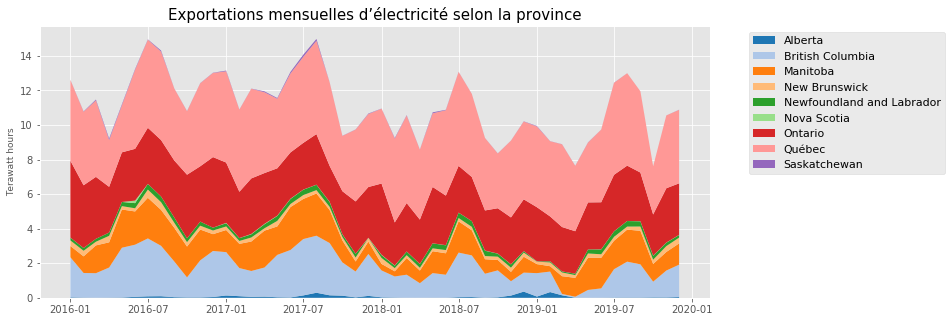

In [29]:
# faire un graphique des exportations d’électricité
provs = [prov for prov in df_exports.columns if prov != 'Total']
exports_chart = df_exports[provs][df_exports.index.year >= 2016].fillna(0)

fig, (ax) = plt.subplots(ncols=1, nrows=1, figsize=(12, 5))
ax.stackplot(exports_chart.index, exports_chart.T)
ax.set_ylabel('Terawatt hours', fontsize=9)
ax.set_title('Exportations mensuelles d’électricité selon la province', fontsize=15)
ax.legend(exports_chart.columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2);

Le Canada exporte de l’électricité uniquement aux États-Unis. Ces exportations proviennent principalement des provinces ayant une importante capacité de production hydroélectrique, soit le Québec, la Colombie-Britannique et le Manitoba.

En général, les échanges commerciaux d’électricité sont influencés par les prix, les conditions météorologiques et des facteurs reliés à l’offre et à la demande régionales. Les facteurs reliés à l’offre régionale comprennent la disponibilité de production excédentaire, les pannes d’alimentation en électricité et les niveaux de précipitation. Les variations de température quotidiennes et saisonnières et les modes d’utilisation industrielle font partie des facteurs reliés à la demande régionale. Tous ces facteurs réunis contribuent à la variabilité des échanges commerciaux d’année en année.


#### 4) Autres ensembles de données liés aux exportations d’électricité du Canada

La base de données sur le commerce international canadien des marchandises renferme des données sur le volume et la valeur des exportations d’électricité selon le partenaire commercial [(lien)](https://www5.statcan.gc.ca/cimt-cicm/home-accueil?lang=fra). Ce rapport repose sur des données commerciales sur base douanière provenant des dossiers administratifs de l’Agence des services frontaliers du Canada et de la Customs Border Protection des États-Unis. Le code du Système harmonisé pour l’énergie électrique est 27160000.

Statistique Canada publie le rapport intitulé L'énergie électrique, services d'électricité et d'industrie, disponibilité et écoulement, annuel (tableau  25-10-0021-01). Ce rapport contient des données sur les importations et les exportations d’électricité et est mis à jour chaque année [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510002101&request_locale=fr). Ce rapport présente également les réceptions et les livraisons interprovinciales d’électricité par province.

Statistique Canada publie le rapport intitulé Production de l'énergie électrique, réceptions, livraisons et disponibilité, mensuel (tableau  25-10-0016-01). Ce rapport mensuel présente les importations et les exportations d’électricité selon la province [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/cv.action?pid=2510001601&request_locale=fr).

La SIERE de l’Ontario publie des données horaires sur les importations et les exportations aux interconnexions de l’Ontario avec les provinces et États voisins, notamment le Manitoba, le Michigan, le Minnesota, New York et le Québec [(lien)](http://reports.ieso.ca/public/IntertieScheduleFlowYear/).

Nova Scotia Power publie des données en temps réel sur les importations et les exportations régionales d’électricité en Nouvelle-Écosse [(lien)](http://oasis.nspower.ca/en/home/oasis/system-reports-and-messages/daily-report.aspx).

Le Nouveau-Brunswick publie un rapport sur les échanges horaires aux interconnexions à l’extérieur de la province (notamment avec la Nouvelle-Écosse, le Québec, l’Île-du-Prince-Édouard, le nord du Maine et la Nouvelle-Angleterre) [(lien)](https://tso.nbpower.com/Public/fr/system_information_archive.aspx).

Le gouvernement de la Colombie-Britannique publie des sommaires mensuels et annuels de l’électricité totale importée des États-Unis et exportée vers ce pays, ainsi que des échanges interprovinciaux  [(lien)](https://www2.gov.bc.ca/gov/content/data/statistics/business-industry-trade/trade/trade-data). BC Hydro publie également des statistiques détaillées en temps réel sur les échanges aux interconnexions entre la Colombie-Britannique et les États-Unis et entre la Colombie-Britannique et l’Alberta à des intervalles de cinq minutes [(liens)](https://www.bchydro.com/energy-in-bc/operations/transmission/transmission-system/actual-flow-data.html).

L’Energy Information Administration des États-Unis publie un rapport sur les échanges d’électricité des États-Unis avec les autorités responsables du maintien de l’équilibre des pays voisins, qui renferme des données sur les échanges quotidiens entre le Canada et les États-Unis [(lien)](https://www.eia.gov/beta/electricity/gridmonitor/dashboard/electric_overview/US48/US48).

La Base de données complète sur la consommation d’énergie de Ressources naturelles Canada renferme des données détaillées sur la demande d’électricité et d’autres produits énergétiques. La base de données présente un aperçu de la consommation d’énergie au Canada selon le secteur (commercial, résidentiel, industriel, agricole et du transport) et dans chaque région du pays [(lien)](http://oee.nrcan.gc.ca/organisme/statistiques/bnce/apd/menus/evolution/tableaux_complets/liste.cfm).

### Importations d’électricité
#### 1) Principal ensemble de données
La Régie de l’énergie du Canada réglemente les importations et les exportations de produits énergétiques. Les sociétés qui importent et exportent de l’électricité détiennent une autorisation réglementaire de la Régie et doivent faire rapport de leurs activités tous les mois. Le Système de suivi des produits (« SSP ») accessible à partir du site Web de la Régie renferme des statistiques sur les exportations d’électricité [(lien)](https://apps.cer-rec.gc.ca/CommodityStatistics/Statistics.aspx?Language=French). Il est possible d’accéder à des fichiers bidimensionnels lisibles par machine provenant du SSP sur le site Web du gouvernement ouvert et ceux-ci sont mis à jour chaque mois [(lien)](https://ouvert.canada.ca/data/fr/dataset/5c358f51-bc8c-4565-854d-9d2e35e6b178).

#### 2) Téléverser l’ensemble de données

In [30]:
# filtrer pour obtenir une fiche de données sur les échanges liés aux importations et transposer selon la destination
df_imports = df_trade[df_trade['Activity'] == 'Imports'][['Period', 'Destination', 'Energy (TW.h)']]
df_imports = df_imports.pivot_table(index='Period', columns='Destination', aggfunc=np.sum)['Energy (TW.h)']

#### 3) Faire un graphique pour l’ensemble de données

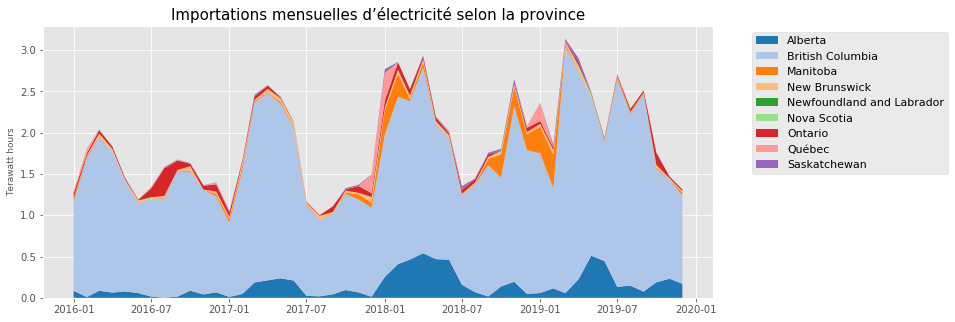

In [33]:
# faire un graphique des importations d’électricité
provs = [prov for prov in df_imports.columns if prov != 'Total' ]
imports_chart = df_imports[provs][df_imports.index.year >= 2016].fillna(0)

fig, (ax) = plt.subplots(ncols=1, nrows=1, figsize=(12, 5))
ax.stackplot(imports_chart.index, imports_chart.fillna(0).T)
ax.set_ylabel('Terawatt hours', fontsize=9)
ax.set_title('Importations mensuelles d’électricité selon la province', fontsize=15)
ax.legend(imports_chart.columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2);

Le Canada importe de l’électricité des États-Unis. Le réseau électrique intégré entre le Canada et les États-Unis permet le transport bidirectionnel afin d’aider les deux pays à composer avec la fluctuation de l’offre et de la demande régionales.

Les provinces canadiennes ont une plus grande capacité d’échange d’électricité avec les États américains le long des interconnexions nord-sud qu’entre provinces voisines. Par conséquent, bien que les prix de l’électricité dans les marchés américains soient habituellement plus élevés que dans les marchés canadiens, les provinces importent souvent de l’électricité des États-Unis lorsque l’offre intérieure est limitée, ou que la capacité de transport à partir d’autres territoires canadiens est restreinte, ou encore durant les périodes de la journée où les prix de l’électricité aux États-Unis sont bas.


#### 4) Autres ensembles de données liés aux importations d’électricité du Canada


La base de données sur le commerce international canadien des marchandises renferme également des données sur le volume et la valeur des importations d’électricité selon le partenaire commercial [(lien)](https://www5.statcan.gc.ca/cimt-cicm/home-accueil?lang=fra). Ce rapport repose sur des données commerciales sur base douanière provenant des dossiers administratifs de l’Agence des services frontaliers du Canada et de la Customs Border Protection des États-Unis. Le code du Système harmonisé pour l’énergie électrique est 27160000.

Statistique Canada publie le rapport intitulé L'énergie électrique, services d'électricité et d'industrie, disponibilité et écoulement, annuel (tableau  25-10-0021-01). Ce rapport contient des données sur les importations et les exportations d’électricité et est mis à jour chaque année [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510002101&request_locale=fr). Ce rapport présente également les réceptions et les livraisons interprovinciales d’électricité par province.

Statistique Canada publie le rapport intitulé Production de l'énergie électrique, réceptions, livraisons et disponibilité, mensuel (tableau  25-10-0016-01). Ce rapport mensuel présente les importations et les exportations d’électricité selon la province [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/cv.action?pid=2510001601&request_locale=fr).

La SIERE de l’Ontario publie des données horaires sur les importations et les exportations aux interconnexions de l’Ontario avec les provinces et États voisins, notamment le Manitoba, le Michigan, le Minnesota, New York et le Québec [(lien)](http://reports.ieso.ca/public/IntertieScheduleFlowYear/).

Nova Scotia Power publie des données en temps réel sur les importations et les exportations régionales d’électricité en Nouvelle-Écosse [(lien)](http://oasis.nspower.ca/en/home/oasis/system-reports-and-messages/daily-report.aspx).

Le Nouveau-Brunswick publie un rapport sur les échanges horaires aux interconnexions à l’extérieur de la province, notamment avec la Nouvelle-Écosse, le Québec, l’Île-du-Prince-Édouard, le nord du Maine et la Nouvelle-Angleterre [(lien)](https://tso.nbpower.com/Public/fr/system_information_archive.aspx).

Le gouvernement de la Colombie-Britannique publie des sommaires mensuels et annuels de l’électricité totale importée des États-Unis et exportée vers ce pays, ainsi que des échanges interprovinciaux  [(lien)](https://www2.gov.bc.ca/gov/content/data/statistics/business-industry-trade/trade/trade-data). BC Hydro publie également des statistiques détaillées en temps réel sur les échanges aux interconnexions entre la Colombie-Britannique et les États-Unis et entre la Colombie-Britannique et l’Alberta à des intervalles de cinq minutes [(liens)](https://www.bchydro.com/energy-in-bc/operations/transmission/transmission-system/actual-flow-data.html).

L’Energy Information Administration des États-Unis publie un rapport sur les échanges d’électricité des États-Unis avec les autorités responsables du maintien de l’équilibre des pays voisins, qui renferme des données sur les échanges quotidiens entre le Canada et les États-Unis [(lien)](https://www.eia.gov/beta/electricity/gridmonitor/dashboard/electric_overview/US48/US48).


### Projection de l’offre et de la demande d’électricité

#### 1) Principal ensemble de données
La Régie de l’énergie du Canada publie le rapport sur l’avenir énergétique [(lien)](https://www.cer-rec.gc.ca/nrg/ntgrtd/ftr/2019/index-fra.html), qui est une projection de l’offre et de la demande énergétiques au Canada jusqu’en 2040. Le rapport présente des projections de l’offre et de la demande d’électricité. Les projections reposent sur des données historiques et comprennent une série d’hypothèses stratégiques, technologiques et commerciales décrites dans le rapport. Le rapport propose des annexes de données [(lien)](https://apps.neb-one.gc.ca/ftrppndc/dflt.aspx?GoCTemplateCulture=fr-CA) et des visualisations interactives [(lien)](https://apps2.cer-rec.gc.ca/dvs/?page=landingPage&) qui permettent d’explorer plus avant l’avenir énergétique du Canada. Le plus récent rapport sur l’avenir énergétique a été publié en décembre 2019.

#### 2) Téléverser l’ensemble de données

In [34]:
# projections de la demande d’électricité du rapport sur l’avenir énergétique (Régie de l’énergie du Canada), les données figurent dans les annexes du rapport
url_demand_forecast = 'https://www.cer-rec.gc.ca/open/energy/energyfutures2019/end-use-demand-2019.csv'
demand_forecast = pd.read_csv(url_demand_forecast, index_col=None, header=0)

# filtrer pour obtenir le scénario de référence et la demande d’électricité au Canada et transposer selon le secteur pour les graphiques
demand_forecast = demand_forecast[(demand_forecast['Region'] == 'Canada') 
                                  & (demand_forecast['Variable_English'] == 'Electricity') 
                                  & (demand_forecast['Sector'] != 'Total End-Use') 
                                  & (demand_forecast['Case'] == 'Reference')][['Year', 'Sector', 'Value']]
demand_forecast = demand_forecast.pivot_table(index='Year', columns='Sector', aggfunc=np.sum)['Value']

In [35]:
# projections de la production d’électricité du rapport sur l’avenir énergétique (Régie de l’énergie du Canada), annexes
url_gen_forecast = 'https://www.cer-rec.gc.ca/nrg/ntgrtd/ftr/2019/ccssndxplr/fgrs-eng.xlsx'
sheet_elec = '26'
gen_forecast = pd.read_excel(url_gen_forecast, sheet_name=sheet_elec, header=4, index_col=0)

#### 3) Faire un graphique pour l’ensemble de données

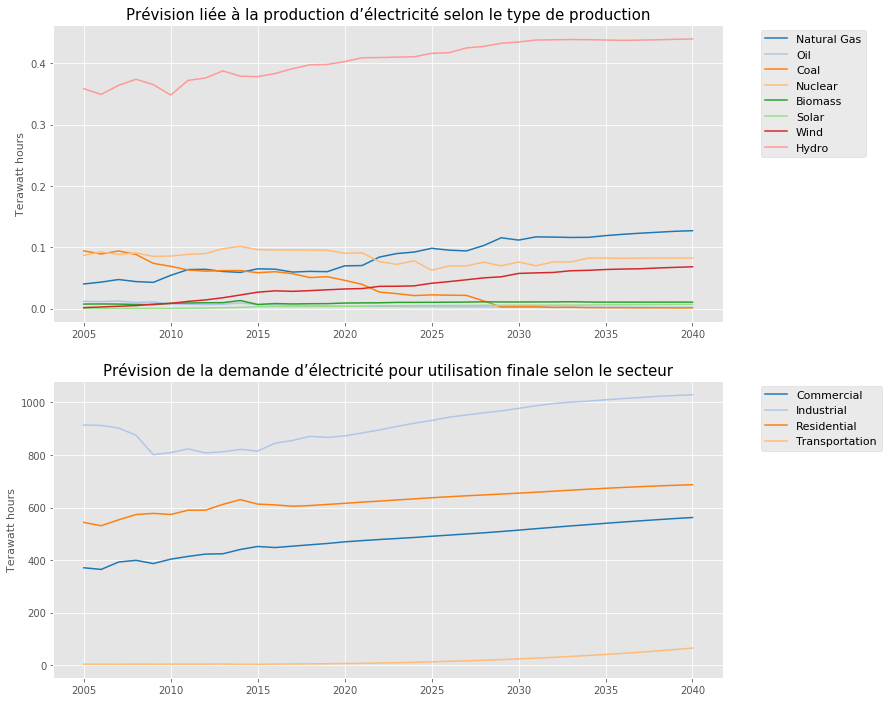

In [37]:
fig, (ax1, ax2)= plt.subplots(ncols=1, nrows=2, figsize=(12, 12))
ax1.plot(gen_forecast.index, gen_forecast/1000)
ax1.set_ylabel('Terawatt hours', fontsize=11)
ax1.set_title('Prévision liée à la production d’électricité selon le type de production', fontsize=15)
ax1.legend(gen_forecast.columns, fontsize=11, bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.4)

ax2.plot(demand_forecast) 
ax2.set_ylabel('Terawatt hours', fontsize=11)
ax2.set_title('Prévision de la demande d’électricité pour utilisation finale selon le secteur', fontsize=15)
ax2.legend(demand_forecast.columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4); 

Dans le scénario de référence, la production canadienne totale d’électricité augmente de plus de 90 térawattheures entre 2017 et 2040, soit d’environ 14 %. L’hydroélectricité, d’autres énergies renouvelables et le gaz naturel dominent cette croissance, alors que la production des centrales alimentées au charbon et nucléaires diminue.

#### 4) Autres ensembles de données liés aux projections de l’offre et de la demande d’électricité au Canada

La SIERE de l’Ontario publie un aperçu sur dix et vingt ans du réseau électrique de la province [(lien)](http://www.ieso.ca/sector-participants/planning-and-forecasting/ontario-planning-outlook).

L’AESO de l’Alberta publie un aperçu à long terme des prévisions concernant la demande et la production d’électricité tous les deux ans [(lien)](https://www.aeso.ca/grid/forecasting/).

En Colombie-Britannique, BC Hydro publie des prévisions sur vingt ans concernant la demande d’électricité et l’offre anticipée [(lien)](https://www.bchydro.com/about/planning-for-our-future/irp.html).


## Autres ressources
Veuillez vous reporter à l’inventaire canadien d’information sur l’énergie [(lien)](https://public.tableau.com/profile/energy.markets%23!/#!/vizhome/CanadianEnergyInformationInventoryCEII-V2_0/Datasets), une base de données interrogeable maintenue par le gouvernement renfermant de l’information et des ensembles de données liés à l’énergie au Canada. Cet inventaire contient les adresses URL de plus de 200 ensembles de données concernant la consommation et la production d’énergie au Canada, et on peut y faire des recherches par auteur, produit et catégorie.

La liste de tous les ensembles de données utilisés dans le présent bloc-notes figure dans l’inventaire. Si vous souhaitez formuler des commentaires sur l’inventaire, veuillez écrire à CEII-ICIE@cer-rec.gc.ca. 


In [38]:
authors = ['Margaret Skwara', 'Janna Rodioukova']